<ul> 
 <center> <b>DECISION TREE</b> </center>
 </ul>

In this code, you will be using a popular machine learning algorithm, Decision Tree. You will use this classification algorithm to build a model from historical data of patients. Then you use the trained decision tree to predict the class of a unknown patient, whether he is Diabetic or Non-Diabetic.

Import the Following Libraries:
<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>DecisionTreeClassifier</b> from <b>sklearn.tree</b> </li>
</ul>

In [4]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

### About dataset
Imagine that you are a medical researcher compiling data for a study. You have collected data about the medical history of a set of patients, all of whom suffered from the some illness. Our target here is to predict if a patient is Diabetic or Non-Diabetic. 

It is a sample of binary classifier, and you can use the training part of the dataset 
to build a decision tree, and then use it to predict the class of a unknown patient.

This model helps in recognising if a patient is prone to diabetes in the early stages.


now, read data using pandas dataframe:

In [6]:
my_data = pd.read_csv("Diabetes.csv", delimiter=",")
my_data[0:5]

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES


In [10]:
my_data.columns = "Pregnancies","Glucose","Diastolic_BP","Triceps_skinfold_thickness","2-Hour_serum_insulin","BMI","Diabetes_pedigree_function","Age","Class"
my_data[0:5]

,Pregnancies,Glucose,Diastolic_BP,Triceps_skinfold_thickness,2-Hour_serum_insulin,BMI,Diabetes_pedigree_function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES


What is the size of data? 

In [9]:
import sys
sys.getsizeof(my_data)

94876

## Pre-processing

Using <b>my_data</b> as the Diabetes.csv data read by pandas, declare the following variables: <br>
<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>
</ul>
<ul>  
    <li> <b> y </b> as the <b> response vector (target) </b> </li>   
</ul>

Remove the column containing the target name since it doesn't contain numeric values.

In [11]:
X = my_data[["Pregnancies","Glucose","Diastolic_BP","Triceps_skinfold_thickness","2-Hour_serum_insulin","BMI","Diabetes_pedigree_function","Age"]].values
X[0:5]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01]])

Now we can fill the target variable.

In [12]:
y = my_data["Class"]
y[0:5]

0    YES
1     NO
2    YES
3     NO
4    YES
Name: Class, dtype: object

---
## Setting up the Decision Tree
We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.

In [13]:
from sklearn.model_selection import train_test_split

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.

In [17]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

## Practice
Print the shape of X_trainset and y_trainset. Ensure that the dimensions match

In [18]:
# your code
print(X_trainset.shape)
print(y_trainset.shape)

(537, 8)
(537,)


Print the shape of X_testset and y_testset. Ensure that the dimensions match

In [19]:
# your code
print(X_testset.shape)
print(y_testset.shape)


(231, 8)
(231,)


## Modeling
We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.

In [20]:
diabeticTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
diabeticTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>

In [21]:
diabeticTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Prediction
Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.

In [22]:
predTree = diabeticTree.predict(X_testset)

You can print out <b>predTree</b> and <b>y_testset</b> if you want to visually compare the prediction to the actual values.

In [23]:
print (predTree [0:5])
print (y_testset [0:5])


['NO' 'YES' 'NO' 'YES' 'NO']
51      NO
378    YES
27      NO
579    YES
86      NO
Name: Class, dtype: object


## Evaluation
Next, let's import __metrics__ from sklearn and check the accuracy of our model.

In [24]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.7056277056277056


__Accuracy classification score__ computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.  

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


In [27]:
#Optimal max depth for decision tree:

# max depth range:

max_depth_range = list(range(1, 10))

# List to store the accuracy for each value of max_depth:

accuracy = []

for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(criterion = 'entropy', max_depth=depth, random_state=4)
    clf.fit(X_trainset,y_trainset)
    score = clf.score(X_testset,y_testset)
    accuracy.append(score)

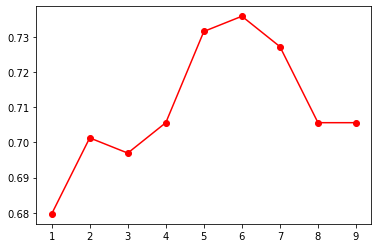

In [28]:
import matplotlib.pyplot as plt # library to do visualizations 

# train accuracy plot 

plt.plot(max_depth_range,accuracy,"ro-")

In [29]:
final_model = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
final_model.fit(X_trainset,y_trainset)
final_pred = final_model.predict(X_testset)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, final_pred))

DecisionTrees's Accuracy:  0.7316017316017316


In [31]:
pd.crosstab(y_testset, final_pred, rownames=['Actual'], colnames=['Predictions'])

Predictions,NO,YES
Actual,,
NO,113,20
YES,42,56


## Calculating accuracy without sklearn:
Can you calculate the accuracy score without sklearn ?

In [32]:
# your code here
acc = np.sum(np.equal(y_testset,final_pred))/len(y_testset)
print(acc)

0.7316017316017316


## Visualization
Lets visualize the tree

In [33]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

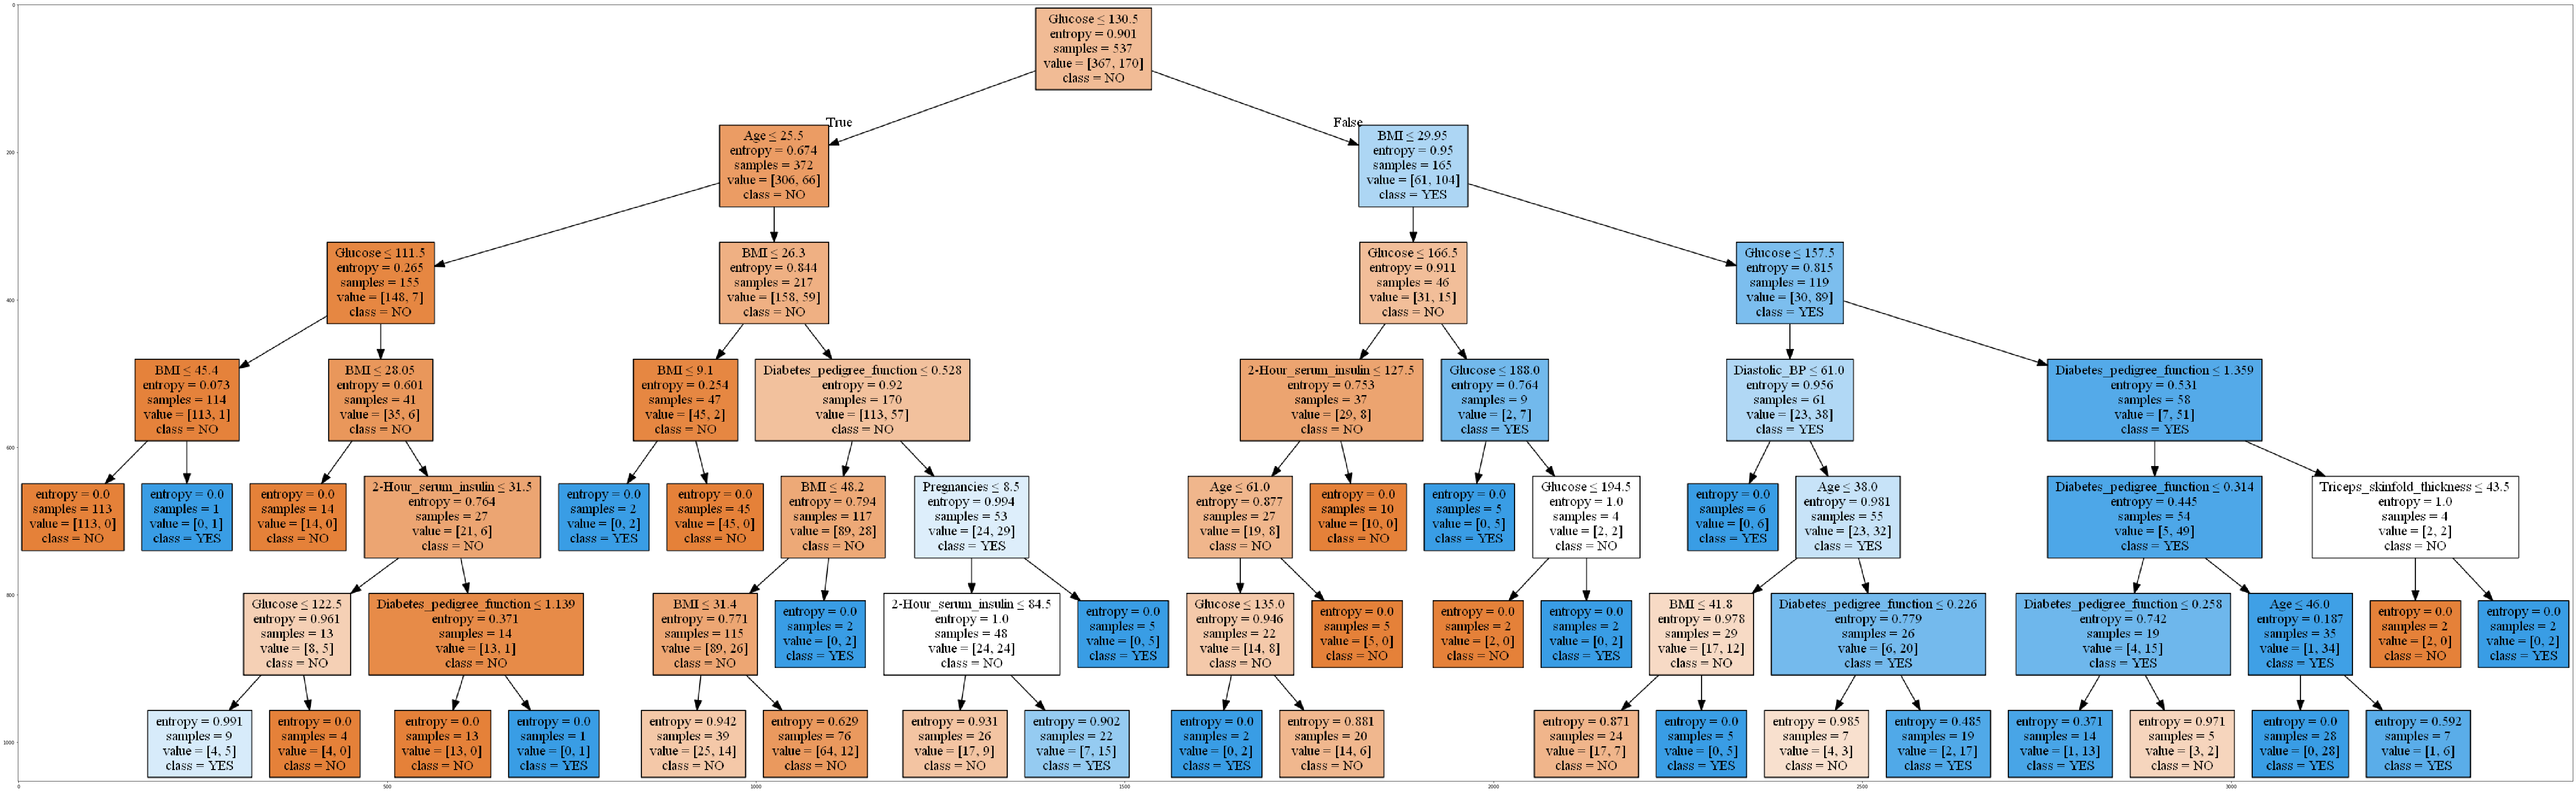

In [36]:
dot_data = StringIO()
filename = "diabetictree.png"
featureNames = my_data.columns[0:8]
targetNames = my_data["Class"].unique().tolist()
out=tree.export_graphviz(final_model,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')